In [374]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection


In [375]:
v1 = 5
v2 = 10
d = 2
x = np.arange(0,17,.5)

ic = np.arcsin(v1/v2)
d_head = 2*d*np.cos(ic)*v2/(v2-v1)

print(d_head)
t_dir = 1/v1*x
t_h =  1/v2*x+2*d*np.cos(ic)/v1
t_ref = 1/v1*np.sqrt(x**2+(2*d)**2)

6.928203230275509


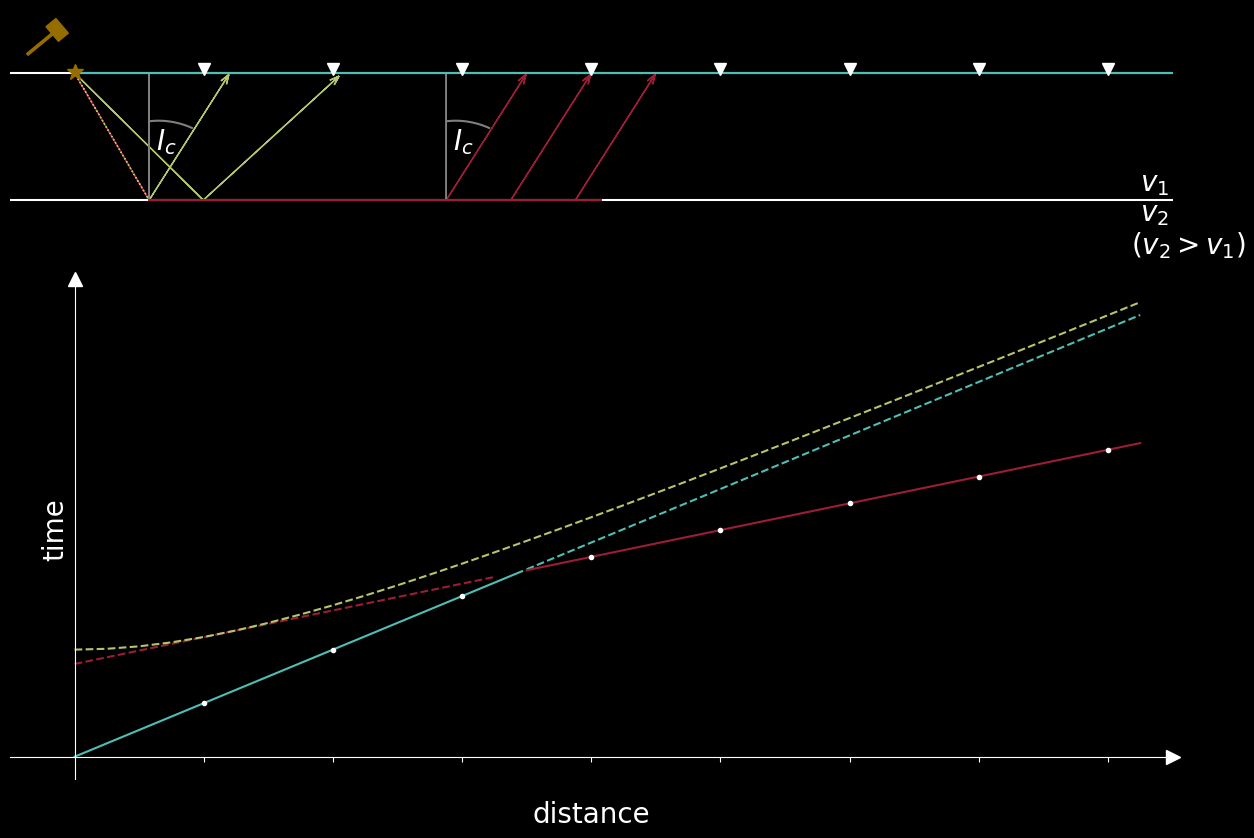

In [376]:
red = (157/255,29/255,55/255)
gold = (150/255,109/255,0/255)
blue = (78/255,191/255,180/255)
green = (178/255,198/255,107/255)

fig,ax=plt.subplots(2,figsize=(15,10),sharex=True,gridspec_kw={'height_ratios': [1, 2.5]},facecolor='k')
ax[0].set_facecolor("k")
ax[1].set_facecolor("k")

plt.rcParams.update({'font.size': 20})
x_surf=np.arange(-1,18,2)
x_geos = np.arange(2,17,2)
ax[0].plot(x_surf,d*np.ones(np.size(x_surf)),"-w")

# direct arrow
ax[0].plot([0,18],[d,d],color=blue)
ax[0].plot(x_surf,np.zeros(np.size(x_surf)),"-w")
ax[0].plot(x_geos,(d+0.07)*np.ones(np.size(x_geos)),"vw",markersize=8)
ax[0].spines["bottom"].set_visible(False)
ax[0].spines["right"].set_visible(False)
ax[0].spines["top"].set_visible(False)
ax[0].spines["left"].set_visible(False)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].text(16.5,0.15,r"$v_1$",color="w")
ax[0].text(16.5,-0.33,r"$v_2$",color="w")
ax[0].text(16.35,-0.85,r"$(v_2>v_1)$",color="w")

# hammer
rec = [Rectangle([-0.25,2.5],0.2,0.3,angle=40),Rectangle([-0.72,2.28],0.5,0.035,angle=40)]
pc = PatchCollection(rec, facecolor=gold, alpha=1,
                         edgecolor=gold)
ax[0].add_collection(pc)
ax[0].plot(0,(d+0.02),"*",color=gold,markersize=12)


# refracted arrows
ax[0].arrow(4.6+d*np.tan(ic),0,d*np.tan(ic),1.85,head_width=0.1,overhang=1,color=red)
ax[0].arrow(0,2,d*np.tan(ic),-2,color=red)
ax[0].plot([d*np.tan(ic),7+d*np.tan(ic)],[0,0],color=red)
angles = np.linspace(0.315*np.pi,0.49*np.pi, 20)
xs = np.cos(1.2*angles)
ys = np.sin(1.1*angles)
ax[0].arrow(4.6+d*np.tan(ic),0,0,2,color=(0.5,0.5,0.5))
ax[0].plot(4.6+xs+1.25*d*np.tan(ic), ys+.25, color = (0.5,0.5,0.5))
ax[0].text(4.6+0.1+d*np.tan(ic),.8,r"$I_c$",color="w")

ax[0].arrow(5.6+d*np.tan(ic),0,d*np.tan(ic),1.85,head_width=0.1,overhang=1,color=red)

ax[0].arrow(6.6+d*np.tan(ic),0,d*np.tan(ic),1.85,head_width=0.1,overhang=1,color=red)

# reflected arrows
ax[0].arrow(0,2,d*np.tan(ic),-2,linestyle=":",color=green)
ax[0].arrow(d*np.tan(ic),0,d*np.tan(ic),1.85,head_width=0.1,overhang=1,color=green)
ax[0].arrow(0,2,d*np.tan(ic+0.26),-2,linestyle="-",color=green)
ax[0].arrow(d*np.tan(ic+0.26),0,d*np.tan(ic+0.26),1.85,head_width=0.1,overhang=1,color=green)
angles = np.linspace(0.315*np.pi,0.49*np.pi, 20)
xs = np.cos(1.2*angles)
ys = np.sin(1.1*angles)
ax[0].arrow(d*np.tan(ic),0,0,2,color=(0.5,0.5,0.5))
ax[0].plot(xs+1.25*d*np.tan(ic), ys+.25, color = (0.5,0.5,0.5))
ax[0].text(0.1+d*np.tan(ic),.8,r"$I_c$",color="w")


ax[1].set_xlim([-1,17])
ax[1].plot(np.append(x[x<d_head],d_head),np.append(t_dir[x<d_head],1/v1*d_head),color=blue)
# ax[1].plot(x[x<d_head],t_dir[x<d_head],color=blue)
ax[1].plot(x[x>=d_head],t_dir[x>=d_head],"--",color=blue)
ax[1].plot(np.array([2,4,6]),1/v1*np.array([2,4,6]),".w")
ax[1].plot(x[x>=d_head],t_h[x>=d_head],color=red)
ax[1].plot(x[x<=d_head],t_h[x<=d_head],"--",color=red)
ax[1].plot(np.arange(8,18,2),1/v2*np.arange(8,18,2)+2*d*np.cos(ic)/v1,".w")
ax[1].plot(x,t_ref,"--",color=green)
ax[1].spines["right"].set_visible(False)
ax[1].spines["top"].set_visible(False)
ax[1].spines['bottom'].set_color('w')
ax[1].spines['left'].set_color('w')
ax[1].spines["left"].set_position("zero")
ax[1].spines["bottom"].set_position("zero")
ax[1].set_yticks([])
ax[1].plot((1), (0), ls="", marker=">", ms=10, color="w",
            transform=ax[1].get_yaxis_transform(), clip_on=False)
plt.xlabel("distance",color="w")
ax[1].plot((0), (1), ls="", marker="^", ms=10, color="w",
            transform=ax[1].get_xaxis_transform(), clip_on=False)
plt.ylabel("time",color="w")
ax[1].set_xticks(x_geos)
ax[1].set_xticklabels([" " for i in x_geos],color="w")
ax[1].tick_params(axis='x', colors='w')

plt.savefig('traveltime.png', transparent=True)

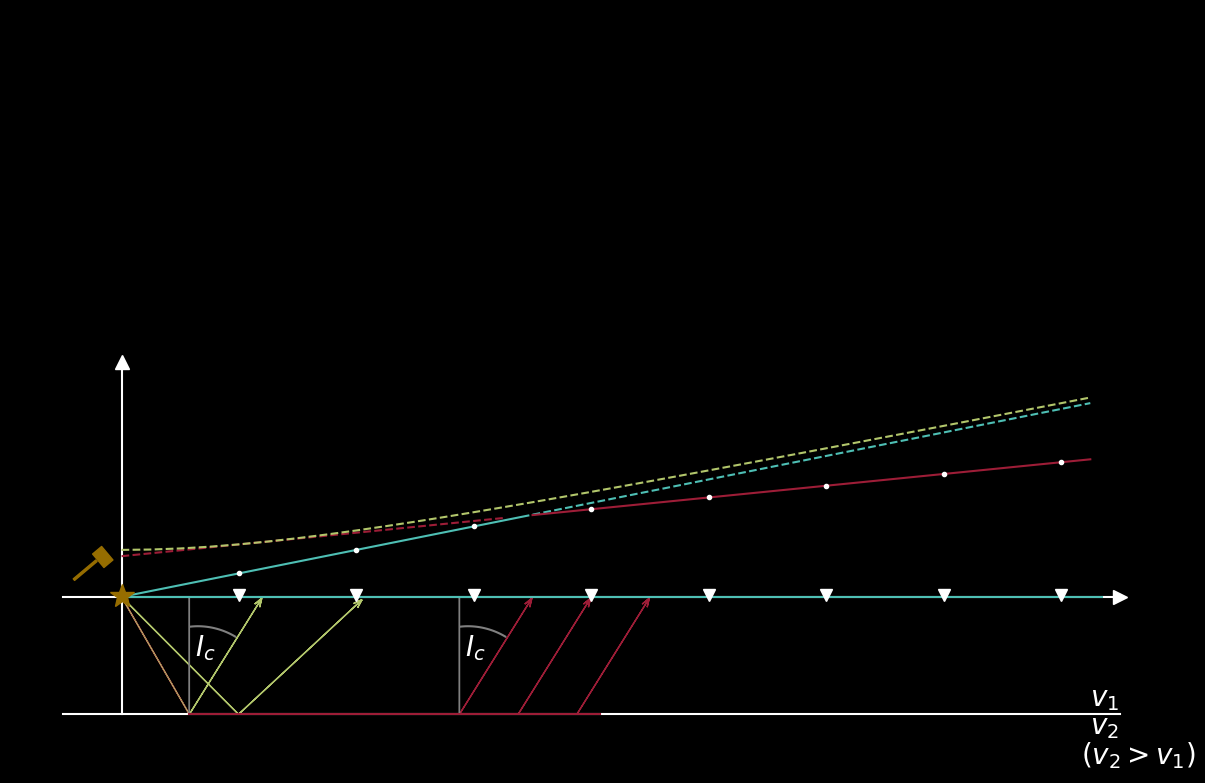

In [377]:
red = (157/255,29/255,55/255)
gold = (150/255,109/255,0/255)
blue = (78/255,191/255,180/255)
green = (178/255,198/255,107/255)

fig,ax=plt.subplots(figsize=(15,10),facecolor='k')
ax.set_facecolor("k")

plt.plot([0,0],[-2,4],"-w")
plt.plot([-1,17],[0,0],"-w")
plt.plot(0,4,"^w",ms=10)
plt.plot(17,0,">w",ms=10)
ax.plot(np.append(x[x<d_head],d_head),np.append(t_dir[x<d_head],1/v1*d_head),color=blue)
ax.plot(x[x>=d_head],t_dir[x>=d_head],"--",color=blue)
ax.plot(np.array([2,4,6]),1/v1*np.array([2,4,6]),".w")
ax.plot(x[x>=d_head],t_h[x>=d_head],color=red)
ax.plot(x[x<d_head],t_h[x<d_head],"--",color=red)
ax.plot(np.arange(8,18,2),1/v2*np.arange(8,18,2)+2*d*np.cos(ic)/v1,".w")
ax.plot(x,t_ref,"--",color=green)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.set_yticks([])
ax.set_xticks([])

ax.tick_params(axis='x', colors='w')

# FIELD PLOT
ax.plot([0,16.7],[0,0],color=blue)

ax.plot(x_geos,0.04*np.ones(np.size(x_geos)),"vw",markersize=8)

# hammer
rec = [Rectangle([-0.3,0.5],0.2,0.3,angle=40),Rectangle([-0.8,0.28],0.5,0.035,angle=40)]
pc = PatchCollection(rec, facecolor=gold, alpha=1,
                         edgecolor=gold)

# negative depth
d=-d

ax.plot(0,0.01,"*",color=gold,markersize=18)
ax.plot(x_surf,d*np.ones(np.size(x_surf)),"-w")

# refracted arrows
ax.arrow(4.6-d*np.tan(ic),d,-d*np.tan(ic),1.85,head_width=0.1,overhang=1,color=red)
ax.arrow(0,0,-d*np.tan(ic),d,color=red)
ax.plot([-d*np.tan(ic),7-d*np.tan(ic)],[d,d],color=red)
angles = np.linspace(0.28*np.pi,0.49*np.pi, 20)
xs = np.cos(1.2*angles)
ys = np.sin(1.1*angles)
ax.arrow(4.6-d*np.tan(ic),0,0,d,color=(0.5,0.5,0.5))
ax.plot(4.6+xs-1.25*d*np.tan(ic), ys-1.5, color = (0.5,0.5,.5))
ax.text(4.6+0.1-d*np.tan(ic),-1,r"$I_c$",color="w")
ax.arrow(5.6-d*np.tan(ic),d,-d*np.tan(ic),1.85,head_width=0.1,overhang=1,color=red)
ax.arrow(6.6-d*np.tan(ic),d,-d*np.tan(ic),1.85,head_width=0.1,overhang=1,color=red)

#  reflected arrows
ax.arrow(0,0,-d*np.tan(ic),-2,linestyle=":",color=green)
ax.arrow(-d*np.tan(ic),d,-d*np.tan(ic),1.85,head_width=0.1,overhang=1,color=green)
ax.arrow(0,0,-d*np.tan(ic+0.26),-2,linestyle="-",color=green)
ax.arrow(-d*np.tan(ic+0.26),d,-d*np.tan(ic+0.26),1.85,head_width=0.1,overhang=1,color=green)
angles = np.linspace(0.28*np.pi,0.49*np.pi, 20)
xs = np.cos(1.2*angles)
ys = np.sin(1.1*angles)
ax.arrow(-d*np.tan(ic),0,0,d,color=(0.5,0.5,0.5))
ax.plot(xs-1.25*d*np.tan(ic), ys-1.5, color = (0.5,0.5,0.5))
ax.text(0.1-d*np.tan(ic),-1,r"$I_c$",color="w")
ax.add_collection(pc)
ax.text(16.5,d+0.15,r"$v_1$",color="w")
ax.text(16.5,d-0.33,r"$v_2$",color="w")
ax.text(16.35,d-0.85,r"$(v_2>v_1)$",color="w")
ax.set_aspect('equal')

plt.savefig('traveltime.png', transparent=True)
#plt.rcParams.update({'font.size': 20})